**IMPORT LIBRARY**

In [3]:
import pandas as pd
import random
from datetime import datetime, timedelta
import numpy as np

**CREATE DUMMY DATA**

In [195]:
import pandas as pd
import random
from datetime import datetime, timedelta


start_time = datetime(2023, 1, 1, 0, 0, 0)
end_time = datetime(2023, 1, 2, 0, 0, 0)
time_step = timedelta(minutes=5)


time_list = []
current_time = start_time
while current_time < end_time:
    time_list.append(current_time)
    current_time += time_step


tag_list = ['O2-90HFJKK/60@FF56', 'HWGROSS-9HYU00/788FKKK', 'TOT-787/AIRP2JJJJ']


data = {'datetime': [], 'tag': [], 'value': []}


for waktu in time_list:
    for jenis in tag_list:
        data['datetime'].append(waktu)
        data['tag'].append(jenis)
        if jenis == 'O2-90HFJKK/60@FF56':
            data['value'].append(round(random.uniform(2.5, 6), 2))
        elif jenis == 'HWGROSS-9HYU00/788FKKK':
            data['value'].append(round(random.randint(50, 100), 0))
        else:  # Coal Flow
            data['value'].append(round(random.randint(100, 200), 0))


df = pd.DataFrame(data)


In [196]:
df.loc[4, 'value'] = np.nan

In [197]:
df

,datetime,tag,value
0,2023-01-01 00:00:00,O2-90HFJKK/60@FF56,5.56
1,2023-01-01 00:00:00,HWGROSS-9HYU00/788FKKK,84.00
2,2023-01-01 00:00:00,TOT-787/AIRP2JJJJ,136.00
3,2023-01-01 00:05:00,O2-90HFJKK/60@FF56,4.85
4,2023-01-01 00:05:00,HWGROSS-9HYU00/788FKKK,NaN
...,...,...,...
859,2023-01-01 23:50:00,HWGROSS-9HYU00/788FKKK,98.00
860,2023-01-01 23:50:00,TOT-787/AIRP2JJJJ,128.00
861,2023-01-01 23:55:00,O2-90HFJKK/60@FF56,3.21
862,2023-01-01 23:55:00,HWGROSS-9HYU00/788FKKK,96.00


**PYTHON MAP**

In [71]:
value_map = {'O2-90HFJKK/60@FF56': 'O2',
             'HWGROSS-9HYU00/788FKKK': 'Gross Load',
             'TOT-787/AIRP2JJJJ': 'Total Air Flow'}
df['tag'] = df['tag'].map(value_map)
df

,datetime,tag,value
0,2023-01-01 00:00:00,O2,4.37
1,2023-01-01 00:00:00,Gross Load,65.00
2,2023-01-01 00:00:00,Total Air Flow,171.00
3,2023-01-01 00:05:00,O2,5.26
4,2023-01-01 00:05:00,Gross Load,NaN
...,...,...,...
859,2023-01-01 23:50:00,Gross Load,54.00
860,2023-01-01 23:50:00,Total Air Flow,114.00
861,2023-01-01 23:55:00,O2,5.23
862,2023-01-01 23:55:00,Gross Load,85.00


**LAMBDA FUNCTION**

In [72]:
df['variable'] = df.apply(lambda row: 'manipulated variable' if row['tag'] == 'O2' else 'constrain variable', axis=1)

In [156]:
df.head()

,datetime,tag,value,variable
0,2023-01-01 00:00:00,O2,4.37,manipulated variable
1,2023-01-01 00:00:00,Gross Load,65.00,constrain variable
2,2023-01-01 00:00:00,Total Air Flow,171.00,constrain variable
3,2023-01-01 00:05:00,O2,5.26,manipulated variable
4,2023-01-01 00:05:00,Gross Load,NaN,constrain variable


**PYHTON FUNCTION**

In [2]:
pi = 3.14159

radius = 5
luas = pi * radius * radius
print(f"Luas lingkaran dengan radius {radius} adalah {luas}")

radius = 7
luas = pi * radius * radius
print(f"Luas lingkaran dengan radius {radius} adalah {luas}")

Luas lingkaran dengan radius 5 adalah 78.53975
Luas lingkaran dengan radius 7 adalah 153.93791


In [3]:
def luas_lingkaran(radius):
    pi = 3.14159
    return pi * radius * radius

print(f"Luas lingkaran dengan radius 5 adalah {luas_lingkaran(5)}")

print(f"Luas lingkaran dengan radius 7 adalah {luas_lingkaran(7)}")

Luas lingkaran dengan radius 5 adalah 78.53975
Luas lingkaran dengan radius 7 adalah 153.93791


**PYTHON PIVOT**

In [77]:
def create_pivot(df):
    df = df.pivot(index='datetime', columns='tag', values='value')
    df = df.rename_axis(None, axis=1)
    return df

In [148]:
df_pivoted = create_pivot(df)
df_pivoted.head()

,Gross Load,O2,Total Air Flow
datetime,,,
2023-01-01 00:00:00,65.0,4.37,171.0
2023-01-01 00:05:00,NaN,5.26,200.0
2023-01-01 00:10:00,100.0,4.03,174.0
2023-01-01 00:15:00,68.0,2.87,170.0
2023-01-01 00:20:00,89.0,2.54,150.0


**PYTHON GROUP BY & AGGREGATE**

In [86]:
df.groupby("tag").mean()

,value
tag,
Gross Load,74.891986
O2,4.147118
Total Air Flow,148.437500


In [87]:
grouped = df.groupby('tag')['value'].agg(['min', 'max'])
grouped

,min,max
tag,,
Gross Load,50.00,100.00
O2,2.52,5.99
Total Air Flow,100.00,200.00


**MERGE & CONCAT**

In [127]:
# kolom baru untuk ditambahkan

O2_v2 = pd.DataFrame(df_pivoted['O2'].apply(lambda x: x * 1.2))
O2_v2 = O2_v2.rename(columns={'O2':'O2_v2'})
display(O2_v2.head())


# baris baru untuk ditambahkan

add_data = df_pivoted.loc['2023-01-01 23:35:00':'2023-01-01 23:55:00']*1.5
add_data.index = add_data.index.map(lambda x: x + pd.Timedelta(minutes=25))
display(add_data)

,O2_v2
datetime,
2023-01-01 00:00:00,5.244
2023-01-01 00:05:00,6.312
2023-01-01 00:10:00,4.836
2023-01-01 00:15:00,3.444
2023-01-01 00:20:00,3.048


,Gross Load,O2,Total Air Flow
datetime,,,
2023-01-02 00:00:00,120.0,5.085,183.0
2023-01-02 00:05:00,123.0,6.495,226.5
2023-01-02 00:10:00,120.0,5.025,196.5
2023-01-02 00:15:00,81.0,8.325,171.0
2023-01-02 00:20:00,127.5,7.845,268.5


In [149]:
df_pivoted = pd.concat([df_pivoted, add_data])
df_pivoted

,Gross Load,O2,Total Air Flow
datetime,,,
2023-01-01 00:00:00,65.0,4.370,171.0
2023-01-01 00:05:00,NaN,5.260,200.0
2023-01-01 00:10:00,100.0,4.030,174.0
2023-01-01 00:15:00,68.0,2.870,170.0
2023-01-01 00:20:00,89.0,2.540,150.0
...,...,...,...
2023-01-02 00:00:00,120.0,5.085,183.0
2023-01-02 00:05:00,123.0,6.495,226.5
2023-01-02 00:10:00,120.0,5.025,196.5


In [152]:
df_pivoted = df_pivoted.merge(O2_v2, how='left', on='datetime')
df_pivoted

,Gross Load,O2,Total Air Flow,O2_v2
datetime,,,,
2023-01-01 00:00:00,65.0,4.370,171.0,5.244
2023-01-01 00:05:00,NaN,5.260,200.0,6.312
2023-01-01 00:10:00,100.0,4.030,174.0,4.836
2023-01-01 00:15:00,68.0,2.870,170.0,3.444
2023-01-01 00:20:00,89.0,2.540,150.0,3.048
...,...,...,...,...
2023-01-02 00:00:00,120.0,5.085,183.0,NaN
2023-01-02 00:05:00,123.0,6.495,226.5,NaN
2023-01-02 00:10:00,120.0,5.025,196.5,NaN


In [153]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def create_viz_2tag(df, col_1, col_2):
    plt.figure(figsize=(12,4), dpi=120)
    plt.plot(df.index, df[col_1], linewidth=2, c='Red', label=col_1)
    plt.plot(df.index, df[col_2], linewidth=2, c='Blue', label=col_2)

    plt.title('Comparation of two tags')
    plt.ylabel('value')
    plt.xlabel('Timestamp')
    plt.legend()
    plt.show()

/tmp/ipykernel_5523/1460825365.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


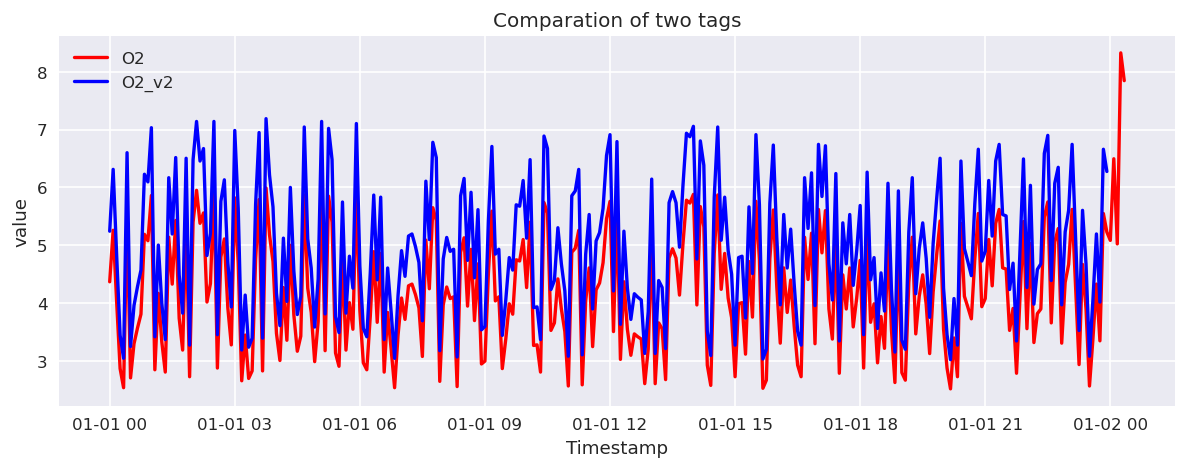

In [154]:
create_viz_2tag(df_pivoted, 'O2', 'O2_v2')

**OBJECT-ORIENTED PROGRAMMING - BUILDING A PYTHON CLASS**

In [198]:
class DataCleaner:
    def __init__(self, data):
        self.data = data

    def rename_tags(self):
        """Remove duplicate rows from the data."""
        value_map = {'O2-90HFJKK/60@FF56': 'O2',
                     'HWGROSS-9HYU00/788FKKK': 'Gross Load',
                     'TOT-787/AIRP2JJJJ': 'Total Air Flow'}
        self.data['tag'] = self.data['tag'].map(value_map)
        df
        return self.data

    def fill_missing_values(self, value=0):
        """Fill missing values in the data."""
        self.data = self.data.fillna(value)
        return self.data

    def create_pivot(self):
        self.data = self.data.pivot(index='datetime',
                                    columns='tag',
                                    values='value')
        self.data = self.data.rename_axis(None, axis=1)
        return self.data


In [199]:
import pandas as pd

cleaner = DataCleaner(df)

In [200]:
df_edited = cleaner.rename_tags()
df_edited = cleaner.fill_missing_values()
df_edited = cleaner.create_pivot()
df_edited

,Gross Load,O2,Total Air Flow
datetime,,,
2023-01-01 00:00:00,84.0,5.56,136.0
2023-01-01 00:05:00,0.0,4.85,200.0
2023-01-01 00:10:00,55.0,3.17,165.0
2023-01-01 00:15:00,94.0,4.08,136.0
2023-01-01 00:20:00,99.0,5.38,145.0
...,...,...,...
2023-01-01 23:35:00,58.0,3.92,126.0
2023-01-01 23:40:00,76.0,2.54,108.0
2023-01-01 23:45:00,64.0,3.73,137.0
